# Strategies

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sp
from discreteMarkovChain import markovChain
%matplotlib inline

In [2]:
strategy={1:{'p':0.25,'q':0.25, 'self_prob': 0.5, 'ter_tran_prob':0.5},2:{'p':0.2,'q':0.3, 'self_prob': 0.5, 'ter_tran_prob':0.5}}

In [3]:
print(strategy)

{1: {'p': 0.25, 'q': 0.25, 'self_prob': 0.5, 'ter_tran_prob': 0.5}, 2: {'p': 0.2, 'q': 0.3, 'self_prob': 0.5, 'ter_tran_prob': 0.5}}


## Question 1.2: Plot Steady state distribution

In [4]:
# n=20
# A = []
# cur_strategy=1
# for i in range(0,n):
#     temp = []
#     for j in range(0,n):
        
#         if(i==j):
#             temp.append(strategy[cur_strategy]['self_prob'])

#         elif (i==0) and (j==i+1):
#             temp.append(strategy[cur_strategy]['ter_tran_prob'])
#         elif (i==n-1) and (j==i-1):
#             temp.append(strategy[cur_strategy]['ter_tran_prob'])

#         elif (i!=j) and (i<(n//2)) and (j==i+1):
#             temp.append(strategy[cur_strategy]['p'])
#         elif (i!=j) and (i<(n//2)) and (j==i-1):
#             temp.append(strategy[cur_strategy]['q'])

#         elif (i!=j) and (i>=(n//2)) and (j==i+1):
#             temp.append(strategy[cur_strategy]['q'])
#         elif (i!=j) and (i>=(n//2)) and (j==i-1):
#             temp.append(strategy[cur_strategy]['p'])
#         else:
#             temp.append(0)
#     A.append(temp)

# temp = []
# for i in range(0,n):
#     temp.append(1)
# A.append(temp)
# A = np.asarray(A)

# B = np.zeros((n))
# # B[-1]=1

# # for tm in A:
# #     print(tm)
# # print(A)
# # print(B)
# print(A.shape)
# print(B.shape)


In [5]:
# np.linalg.solve(A,B)
# np.linalg.solve(A.T.dot(A), A.T.dot(B))

In [6]:
# a,b,c,d = sp.symbols(list("abcd"))

# eqns = [a+3*b+2*c+2*d-1,
#         2*a+b+c+2*d,
#         3*a+b+2*c+d-1,
#         2*a+c+3*d]

# sp.solve(eqns,a,b,c,d)

In [47]:
def cal_transition_probas(n,cur_strategy, is_print=False):
    tran = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            
            if(i==j):
                tran[i,j] = strategy[cur_strategy]['self_prob']

            elif (i==0) and (j==i+1):
                tran[i,j] = strategy[cur_strategy]['ter_tran_prob']
            elif (i==n-1) and (j==i-1):
                tran[i,j] = strategy[cur_strategy]['ter_tran_prob']

            elif (i!=j) and (i<(n//2)) and (j==i+1):
                tran[i,j] = strategy[cur_strategy]['p']
            elif (i!=j) and (i<(n//2)) and (j==i-1):
                tran[i,j] = strategy[cur_strategy]['q']

            elif (i!=j) and (i>=(n//2)) and (j==i+1):
                tran[i,j] = strategy[cur_strategy]['q']
            elif (i!=j) and (i>=(n//2)) and (j==i-1):
                tran[i,j] = strategy[cur_strategy]['p']

    if(is_print):
        print(f'[N={n}, Strategy: {cur_strategy}]')
        print("Transition Matrix:")
        print(f'Shape: ({len(tran)},{len(tran[0])})',)
        for tm in tran:
            print(tm)
    
    return tran

In [19]:
# n=20
# cur_strategy = 2
# tran_probas = cal_transition_probas(n=n, cur_strategy=cur_strategy)

In [81]:
def cal_steady_state_probas(n,cur_strategy, is_print=False):
    A = []
    tran_probas = cal_transition_probas(n,cur_strategy)
    for i in range(0,n):
        temp = []
        for j in range(0,n):
            
            if(i==j):
                temp.append(-1.0* tran_probas[i,j])

            elif (i==0) and (j==i+1):
                temp.append(tran_probas[j,i])
            elif (i==n-1) and (j==i-1):
                temp.append(tran_probas[j,i])

            elif (i!=j) and ((j==i-1) or (j==i+1)):
                temp.append(tran_probas[j,i])
            else:
                temp.append(0)
        A.append(temp)

    if(is_print):
        print(f'[N={n}, Strategy: {cur_strategy}]')
        print("System of Equation:")
        print(f'Shape: ({len(A)},{len(A[0])})',)
        for tm in A:
            print(tm)
    A = np.asarray(A)

    dim = A.shape[0]
    q = (A-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)

[0.04397888 0.05092829 0.0487482  0.04779554 0.04753282 0.04747071
 0.04745713 0.0474543  0.04745373 0.04745362 0.04745362 0.04745373
 0.0474543  0.04745713 0.04747071 0.04753282 0.04779554 0.0487482
 0.05092829 0.04397888]


Text(0, 0.5, 'Steady State Probability')

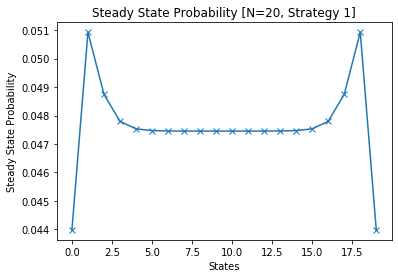

In [87]:
n=20
cur_strategy=1
steady_state_probas = cal_steady_state_probas(n,cur_strategy)
print(steady_state_probas)
plt.plot(range(len(steady_state_probas)), steady_state_probas, marker='x')
plt.title(f"Steady State Probability [N={n}, Strategy {cur_strategy}]")
plt.xlabel("States")
plt.ylabel("Steady State Probability")

[0.04608556 0.05282415 0.04930239 0.04790498 0.04752333 0.04742267
 0.04735747 0.04716189 0.04642711 0.04428576 0.04428576 0.04642711
 0.04716189 0.04735747 0.04742267 0.04752333 0.04790498 0.04930239
 0.05282415 0.04608556]


Text(0, 0.5, 'Steady State Probability')

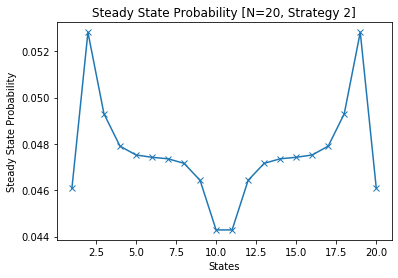

In [88]:
n=20
cur_strategy=2
steady_state_probas = cal_steady_state_probas(n,cur_strategy)
print(steady_state_probas)
plt.plot(range(len(steady_state_probas)), steady_state_probas, marker='x')
plt.title(f"Steady State Probability [N={n}, Strategy {cur_strategy}]")
plt.xlabel("States")
plt.ylabel("Steady State Probability")

[0.02631579 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.02631579]


Text(0, 0.5, 'Steady State Probability')

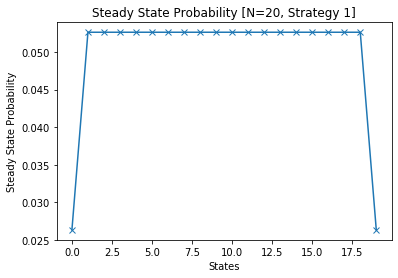

In [108]:
n=20
cur_strategy=1
tran_probas = cal_transition_probas(n, cur_strategy)
mc = markovChain(tran_probas)
mc.computePi('linear')
print(mc.pi)
plt.plot(range(len(mc.pi)), mc.pi, marker='x')
plt.title(f"Steady State Probability [N={n}, Strategy {cur_strategy}]")
plt.xlabel("States")
plt.ylabel("Steady State Probability")

[0.08517977 0.14196628 0.09464419 0.06309612 0.04206408 0.02804272
 0.01869515 0.01246343 0.00830895 0.0055393  0.0055393  0.00830895
 0.01246343 0.01869515 0.02804272 0.04206408 0.06309612 0.09464419
 0.14196628 0.08517977]


Text(0, 0.5, 'Steady State Probability')

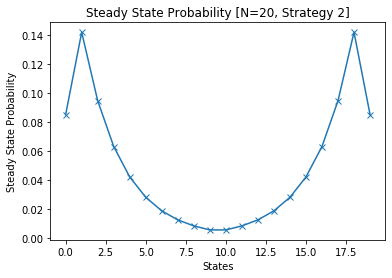

In [109]:
n=20
cur_strategy=2
tran_probas = cal_transition_probas(n, cur_strategy)
mc = markovChain(tran_probas)
mc.computePi('linear')
print(mc.pi)
plt.plot(range(len(mc.pi)), mc.pi, marker='x')
plt.title(f"Steady State Probability [N={n}, Strategy {cur_strategy}]")
plt.xlabel("States")
plt.ylabel("Steady State Probability")

## Question 1.4

In [131]:
def simulate_chain(n,cur_strategy, start_state=0, times=1000):
    tran_probas = cal_transition_probas(n,cur_strategy)
    x = np.zeros((1,n))
    x[0,start_state]=1

    tran_probas = cal_transition_probas(n, cur_strategy)
    mc = markovChain(tran_probas)
    mc.computePi('linear')
    
    temp = tran_probas
    distances = []
    for k in range(times):
        temp = temp @ tran_probas
        # temp_ss_probas = temp @ x.T
        temp_ss_probas = temp[start_state]

        # ss_probas = [ tm[0] for tm in temp_ss_probas ]
        ss_probas = temp_ss_probas

        ss_probas = np.array(ss_probas)
        diff = ss_probas - mc.pi
        diff_sq = np.square(diff)
        dis = np.sum(np.sqrt(diff_sq))
        distances.append(dis)

        if(k==times-1):
            print(temp_ss_probas)
    
    plt.plot(range(len(distances)), distances, marker='x')
    plt.title(f"Simulate [1,{times}] [N={n}, Strategy {cur_strategy}]")
    plt.xlabel("Iterations")
    plt.ylabel(f"Distance from Steady State")


[0.02637158 0.05274163 0.05273711 0.0527297  0.05271962 0.05270714
 0.0526926  0.0526764  0.05265897 0.05264079 0.05262237 0.05260419
 0.05258676 0.05257055 0.05255601 0.05254353 0.05253345 0.05252605
 0.05252153 0.02626   ]


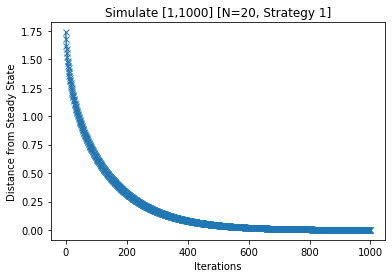

In [129]:
simulate_chain(n=20,cur_strategy=1, start_state=0, times=1000)

[0.11921497 0.19857811 0.1320831  0.08762824 0.05790986 0.03804475
 0.02476799 0.01589657 0.00997084 0.00601481 0.0050638  0.00664707
 0.00903029 0.0126223  0.01804069 0.02621831 0.03856401 0.05720527
 0.08535445 0.05114457]


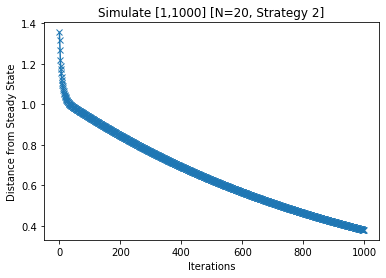

In [130]:
simulate_chain(n=20,cur_strategy=2, start_state=0, times=1000)

[0.07786779 0.12980404 0.08660097 0.05782575 0.03865985 0.02589393
 0.01739048 0.01172587 0.00795192 0.00543715 0.00564146 0.00866599
 0.01320099 0.01999981 0.03019151 0.04546832 0.0683665  0.1026874
 0.15412852 0.09249174]


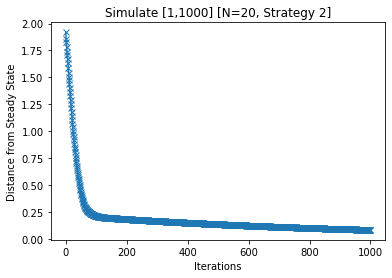

In [132]:
simulate_chain(n=20,cur_strategy=2, start_state=10, times=1000)

[0.05114457 0.08535445 0.05720527 0.03856401 0.02621831 0.01804069
 0.0126223  0.00903029 0.00664707 0.0050638  0.00601481 0.00997084
 0.01589657 0.02476799 0.03804475 0.05790986 0.08762824 0.1320831
 0.19857811 0.11921497]


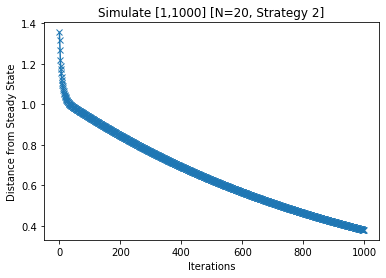

In [137]:
simulate_chain(n=20,cur_strategy=2, start_state=19, times=1000)